<a href="https://colab.research.google.com/github/PhuongAnh2212/VN-Traffic-Sign/blob/main/KaggleData_Traffic_Sign_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
zip_path = "/content/drive/MyDrive/vn-traffic-sign.zip"  # Change this
extract_path = "/content/dataset"  # Folder where the dataset will be extracted

In [7]:
import zipfile
import os

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
print("Extracted files:", os.listdir(extract_path))

Extracted files: ['archive']


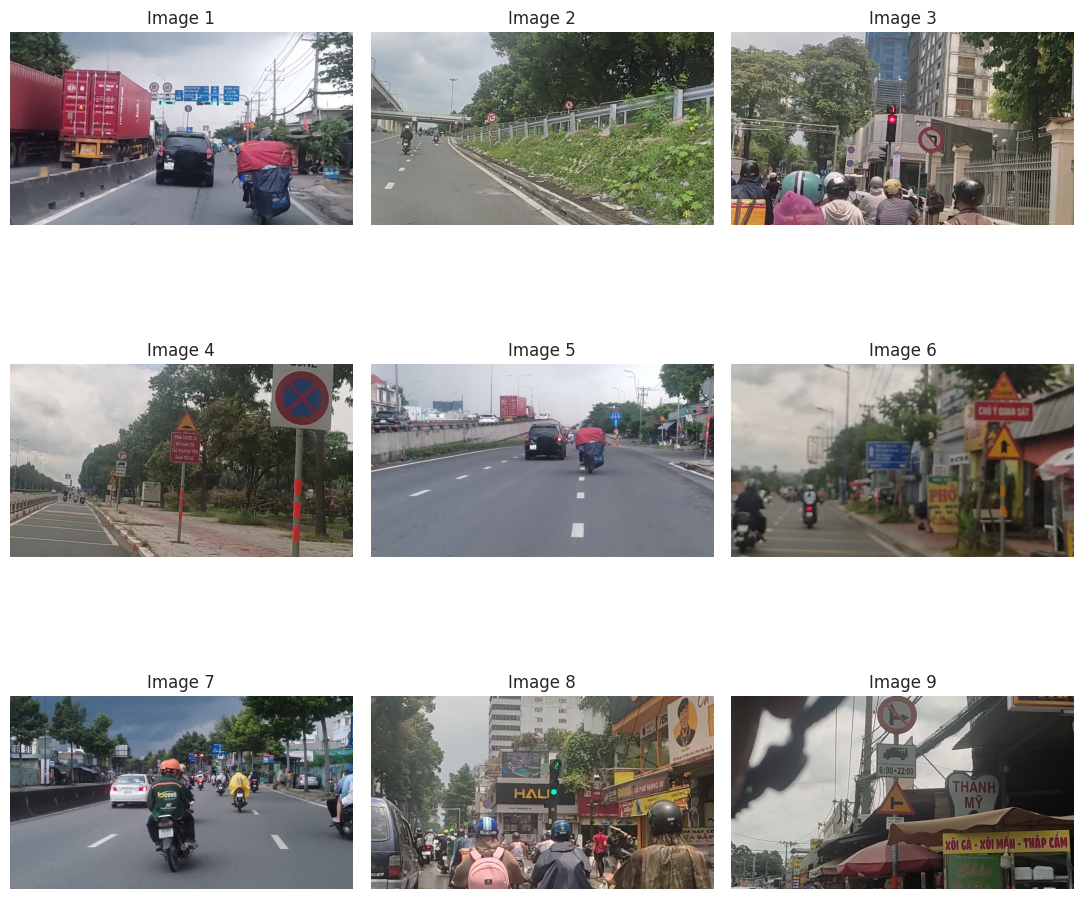

In [8]:
import os
import random
import matplotlib.pyplot as plt

# Correct dataset path
Image_dir = "/content/dataset/archive/images"

# Filter only image files
image_files = [f for f in os.listdir(Image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Ensure we sample only available images
num_samples = min(9, len(image_files))  # Prevent sampling errors

if num_samples == 0:
    print("No images found in the dataset!")
else:
    rand_images = random.sample(image_files, num_samples)

    # Plot the images
    fig, axes = plt.subplots(3, 3, figsize=(11, 11))

    for i in range(num_samples):
        image_path = os.path.join(Image_dir, rand_images[i])
        image = plt.imread(image_path)

        ax = axes[i // 3, i % 3]
        ax.imshow(image)
        ax.set_title(f'Image {i+1}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [9]:
image = cv2.imread("/content/dataset/archive/images/0001.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 960x540 and 3 channels.


# Image Instance


image 1/1 /content/dataset/archive/split_dataset/test/3211.jpg: 384x640 2 persons, 8.0ms
Speed: 2.4ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


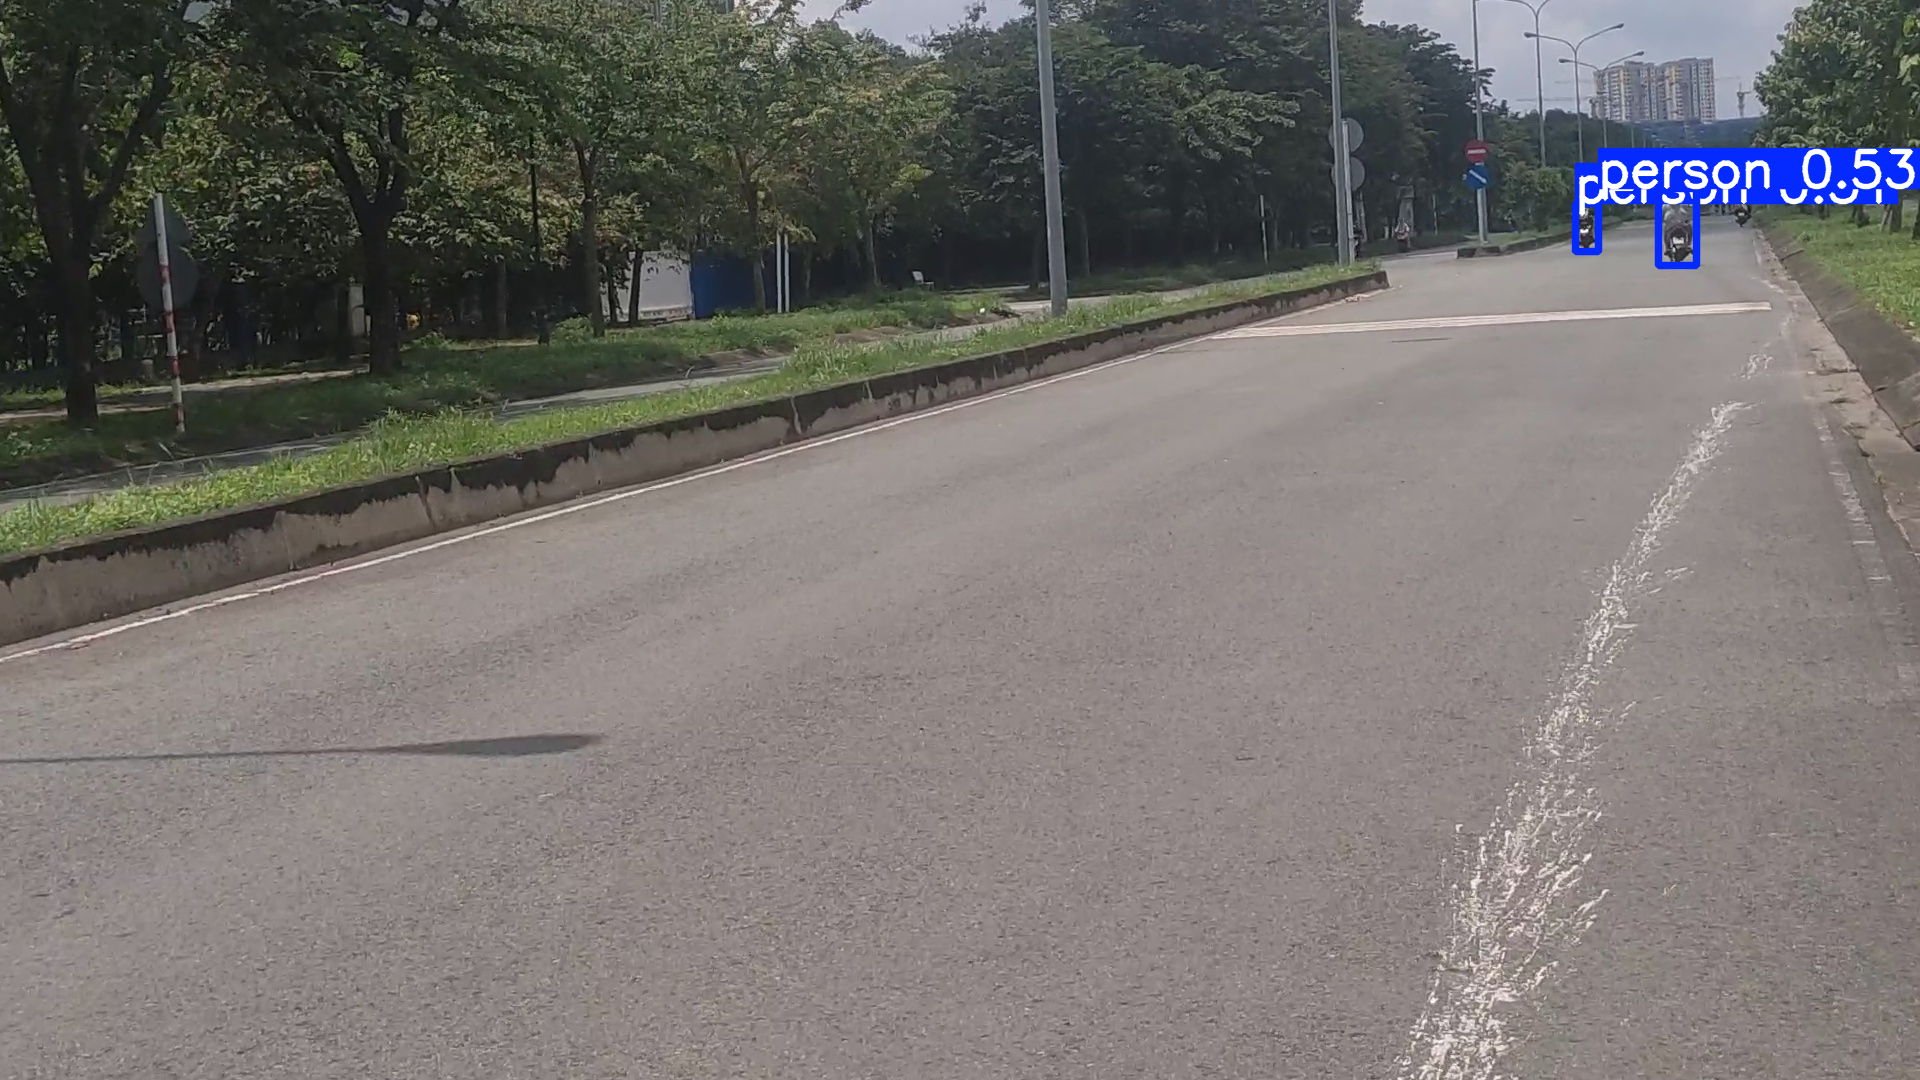

In [10]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/dataset/archive/split_dataset/test/3211.jpg"

result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/dataset/archive/images/1111.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

# Train for traffic sign

In [10]:
!pip install --upgrade ultralytics ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 MB 10.3 MB/s eta 0:00:00


In [11]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

In [12]:
dataset_path = "/content/dataset/archive/images"
output_path = "/content/dataset/archive/split_dataset"
os.makedirs(output_path, exist_ok=True)

In [13]:
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
print(f"Total images found: {len(image_files)}")
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

train_files, temp_files = train_test_split(image_files, test_size=(val_ratio + test_ratio), random_state=42)

val_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)
print(f"Train: {len(train_files)}, Validation: {len(val_files)}, Test: {len(test_files)}")

Total images found: 3216
Train: 2251, Validation: 482, Test: 483


In [14]:
def copy_files(file_list, destination_folder):
    os.makedirs(destination_folder, exist_ok=True)
    for file in file_list:
        shutil.copy(os.path.join(dataset_path, file), os.path.join(destination_folder, file))

# Create train, val, and test folders
copy_files(train_files, os.path.join(output_path, "train"))
copy_files(val_files, os.path.join(output_path, "val"))
copy_files(test_files, os.path.join(output_path, "test"))

print("✅ Data successfully split into train, val, and test sets!")

✅ Data successfully split into train, val, and test sets!


In [15]:
print("Train images:", len(os.listdir(os.path.join(output_path, "train"))))
print("Validation images:", len(os.listdir(os.path.join(output_path, "val"))))
print("Test images:", len(os.listdir(os.path.join(output_path, "test"))))

Train images: 2251
Validation images: 482
Test images: 483


In [16]:
# Read class names from file
class_file = "/content/dataset/archive/classes_en.txt"  # Update this path if necessary

with open(class_file, "r") as f:
    class_names = [line.strip() for line in f.readlines()]

# Print classes to verify
print(f"✅ Found {len(class_names)} classes:\n", class_names)

✅ Found 54 classes:
 ['Pedestrian Crossing', 'Equal-level Intersection', 'No Entry', 'Right Turn Only', 'Intersection', 'Intersection with a non-priority road', 'Dangerous Turn', 'No Left Turn', 'Bus Stop', 'Roundabout', 'No Stopping and No Parking', 'U-Turn Allowed', 'Lane Allocation', 'No Left Turn for Motorcycles', 'Slow Down', 'No Trucks Allowed', 'Narrow Road on the Right', 'No Passenger Cars and Trucks', 'Height Limit', 'No U-Turn', 'No U-Turn and No Right Turn', 'No Cars Allowed', 'Narrow Road on the Left', 'Uneven Road', 'No Two or Three-wheeled Vehicles', 'Customs Checkpoint', 'Motorcycles Only', 'Obstacle on the Road', 'Children Present', 'Trucks and Containers', 'No Motorcycles Allowed', 'Trucks Only', 'Road with Surveillance Camera', 'No Right Turn', 'Double curve first to right', 'No Containers Allowed', 'No Left or Right Turn', 'No Straight and Right Turn', 'Intersection with T-Junction', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (80km/h)', 'Speed limit

In [17]:
import yaml

# Define dataset information
dataset_info = {
    "path": "/content/dataset/archive/split_dataset/images",
    "train": "train",
    "val": "val",
    "test": "test",
    "nc": 54,  # Number of classes
    "names": [
        "Pedestrian Crossing",
        "Equal-level Intersection",
        "No Entry",
        "Right Turn Only",
        "Intersection",
        "Intersection with a non-priority road",
        "Dangerous Turn",
        "No Left Turn",
        "Bus Stop",
        "Roundabout",
        "No Stopping and No Parking",
        "U-Turn Allowed",
        "Lane Allocation",
        "No Left Turn for Motorcycles",
        "Slow Down",
        "No Trucks Allowed",
        "Narrow Road on the Right",
        "No Passenger Cars and Trucks",
        "Height Limit",
        "No U-Turn",
        "No U-Turn and No Right Turn",
        "No Cars Allowed",
        "Narrow Road on the Left",
        "Uneven Road",
        "No Two or Three-wheeled Vehicles",
        "Customs Checkpoint",
        "Motorcycles Only",
        "Obstacle on the Road",
        "Children Present",
        "Trucks and Containers",
        "No Motorcycles Allowed",
        "Trucks Only",
        "Road with Surveillance Camera",
        "No Right Turn",
        "Double curve first to right",
        "No Containers Allowed",
        "No Left or Right Turn",
        "No Straight and Right Turn",
        "Intersection with T-Junction",
        "Speed limit (50km/h)",
        "Speed limit (60km/h)",
        "Speed limit (80km/h)",
        "Speed limit (40km/h)",
        "Left Turn",
        "Low Clearance",
        "Other Danger",
        "Go Straight",
        "No Parking",
        "Containers Only",
        "No U-Turn for Cars",
        "Level Crossing with Barriers",
        "No U-Turn and No Left Turn",
        "Right Turn Around",
        "Speed Bumps Ahead"
    ]
}

# Save to YAML file
yaml_path = "/content/dataset/archive/data.yaml"
with open(yaml_path, "w") as file:
    yaml.dump(dataset_info, file, default_flow_style=False)

print(f"✅ Dataset YAML file created at {yaml_path}")

✅ Dataset YAML file created at /content/dataset/archive/data.yaml


In [18]:
import os
import shutil
import random

# Define source and destination paths
image_dir = "/content/dataset/archive/images"  # Source images
label_dir = "/content/dataset/archive/labels"  # Source labels
train_img_dir = "/content/dataset/archive/split_dataset/images/train"
val_img_dir = "/content/dataset/archive/split_dataset/images/val"
train_lbl_dir = "/content/dataset/archive/split_dataset/labels/train"
val_lbl_dir = "/content/dataset/archive/split_dataset/labels/val"

# Create train/val directories if they don't exist
os.makedirs(train_img_dir, exist_ok=True)
os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(train_lbl_dir, exist_ok=True)
os.makedirs(val_lbl_dir, exist_ok=True)

# Get all image files (JPG, PNG)
image_files = [f for f in os.listdir(image_dir) if f.endswith((".jpg", ".png"))]

# Shuffle images for randomness
random.seed(42)  # Set seed for reproducibility
random.shuffle(image_files)

# Split: 80% train, 20% val
split_idx = int(len(image_files) * 0.8)
train_files = image_files[:split_idx]
val_files = image_files[split_idx:]

# Move images and corresponding labels to train/val folders
for file in train_files:
    shutil.move(os.path.join(image_dir, file), os.path.join(train_img_dir, file))
    label_file = file.rsplit(".", 1)[0] + ".txt"  # Convert image name to label name
    if os.path.exists(os.path.join(label_dir, label_file)):
        shutil.move(os.path.join(label_dir, label_file), os.path.join(train_lbl_dir, label_file))

for file in val_files:
    shutil.move(os.path.join(image_dir, file), os.path.join(val_img_dir, file))
    label_file = file.rsplit(".", 1)[0] + ".txt"
    if os.path.exists(os.path.join(label_dir, label_file)):
        shutil.move(os.path.join(label_dir, label_file), os.path.join(val_lbl_dir, label_file))

print("✅ Dataset shuffled and split into train (80%) and val (20%)!")

✅ Dataset shuffled and split into train (80%) and val (20%)!


In [ ]:
import os
import json
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Define dataset path
dataset_yaml = "/content/dataset/archive/data.yaml"

# Define checkpoint and log directories
checkpoint_dir = "/content/dataset/archive/checkpoints"
log_file = "/content/dataset/archive/training_metrics.json"

# Create directories if they don't exist
os.makedirs(checkpoint_dir, exist_ok=True)

# List to store training logs
training_logs = []

# Train YOLO for 200 epochs and log results
for epoch in range(1, 51):
    print(f"🚀 Training Epoch {epoch}/50")

    results = model.train(
        data=dataset_yaml,
        epochs=1,  # Train one epoch at a time
        imgsz=640,
        batch=8,
        device="cuda"
    )

    # Extract metrics safely
    metrics = results.metrics if hasattr(results, "metrics") else None
    if not metrics:
        print(f"❌ No metrics recorded for epoch {epoch}")
        continue

    epoch_metrics = {
        "epoch": epoch,
        "loss": metrics.box_loss + metrics.cls_loss + metrics.dfl_loss,
        "precision": metrics.precision,
        "recall": metrics.recall,
        "mAP50": metrics.map50,
        "mAP50-95": metrics.map
    }

    # Save logs
    training_logs.append(epoch_metrics)

    # Save checkpoint and log every 5 epochs
    if epoch % 5 == 0:
        checkpoint_path = f"{checkpoint_dir}/yolov8_epoch{epoch}.pt"
        model.export(format="torchscript", save_dir=checkpoint_dir)
        print(f"✅ Checkpoint saved at: {checkpoint_path}")

        # Save metrics to JSON file
        with open(log_file, "w") as f:
            json.dump(training_logs, f, indent=4)
        print(f"📊 Training metrics saved at: {log_file}")


100%|██████████| 6.25M/6.25M [00:00<00:00, 77.6MB/s]


🚀 Training Epoch 1/50
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/archive/data.yaml, epochs=1, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 63.9MB/s]


Overriding model.yaml nc=80 with nc=54

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

  0%|          | 16.0k/5.35M [00:00<00:00, 22.0MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/archive/split_dataset/labels/train... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:01<00:00, 2300.94it/s]

train: New cache created: /content/dataset/archive/split_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/archive/split_dataset/labels/val... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<00:00, 1007.82it/s]


val: New cache created: /content/dataset/archive/split_dataset/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.19G      1.341      5.288     0.9705         20        640: 100%|██████████| 322/322 [01:11<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.82it/s]


                   all        644       1678      0.499     0.0832     0.0604     0.0433

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.61it/s]


                   all        644       1678        0.5     0.0834     0.0606     0.0434
   Pedestrian Crossing         62         62      0.165      0.419      0.162      0.097
Equal-level Intersection          6          6          1          0          0          0
              No Entry         92         92          1          0     0.0298      0.019
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8          1          0    0.00345    0.00247
Intersection with a non-priority road         41         41      0.202      0.341      0.167      0.122
        Dangerous Turn         59         64          0          0     0.0155     0.0107
          No Left Turn         31         31      0.163      0.323      0.156      0.113
              Bus Stop         39         39          0          0    0.00135   0.000679
            Roundabout          4          4          0          0    0.00403    0.00265
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.27G      1.226      3.928     0.9086         20        640: 100%|██████████| 322/322 [01:13<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.24it/s]


                   all        644       1678      0.648      0.117      0.114     0.0803

1 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  5.05it/s]


                   all        644       1678      0.648      0.117      0.114     0.0802
   Pedestrian Crossing         62         62      0.324      0.452      0.278      0.163
Equal-level Intersection          6          6          1          0          0          0
              No Entry         92         92      0.507     0.0435     0.0783     0.0486
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8          1          0    0.00515    0.00359
Intersection with a non-priority road         41         41      0.145      0.293      0.146      0.103
        Dangerous Turn         59         64     0.0672     0.0156     0.0508     0.0339
          No Left Turn         31         31      0.444      0.386      0.367      0.288
              Bus Stop         39         39          0          0     0.0173      0.011
            Roundabout          4          4          0          0    0.00728    0.00456
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.28G      1.123      3.305     0.8906         20        640: 100%|██████████| 322/322 [01:09<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.54it/s]


                   all        644       1678      0.587       0.18      0.161      0.113

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train22/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22/weights/best.pt, 6.2MB

Validating runs/detect/train22/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]


                   all        644       1678      0.587      0.179      0.161      0.114
   Pedestrian Crossing         62         62      0.333      0.661      0.423      0.251
Equal-level Intersection          6          6          1          0      0.002      0.001
              No Entry         92         92      0.478      0.087      0.145     0.0907
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8          0          0     0.0202     0.0137
Intersection with a non-priority road         41         41      0.123       0.39      0.148      0.102
        Dangerous Turn         59         64      0.245      0.112      0.123     0.0826
          No Left Turn         31         31      0.544      0.419      0.496      0.365
              Bus Stop         39         39      0.431      0.436      0.366      0.252
            Roundabout          4          4          0          0     0.0118    0.00737
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.27G      1.039      2.876     0.8742         20        640: 100%|██████████| 322/322 [01:09<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.15it/s]


                   all        644       1678      0.617       0.21      0.215       0.15

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train222/weights/best.pt, 6.2MB

Validating runs/detect/train222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.77it/s]


                   all        644       1678      0.617       0.21      0.215       0.15
   Pedestrian Crossing         62         62      0.359       0.71      0.617      0.387
Equal-level Intersection          6          6          1          0    0.00689    0.00392
              No Entry         92         92      0.427       0.13      0.281      0.168
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8          0          0     0.0516     0.0348
Intersection with a non-priority road         41         41      0.151      0.439      0.163      0.117
        Dangerous Turn         59         64      0.317      0.156      0.173      0.112
          No Left Turn         31         31      0.558       0.53      0.532      0.394
              Bus Stop         39         39      0.379      0.564      0.494      0.338
            Roundabout          4          4          0          0     0.0135    0.00887
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.28G     0.9689      2.558     0.8616         20        640: 100%|██████████| 322/322 [01:09<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.04it/s]


                   all        644       1678      0.604      0.227      0.259      0.181

1 epochs completed in 0.027 hours.
Optimizer stripped from runs/detect/train2222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2222/weights/best.pt, 6.2MB

Validating runs/detect/train2222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.94it/s]


                   all        644       1678      0.605      0.226      0.259      0.181
   Pedestrian Crossing         62         62      0.515      0.677      0.654      0.418
Equal-level Intersection          6          6          1          0     0.0281     0.0206
              No Entry         92         92      0.614      0.242      0.403      0.238
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8          0          0     0.0519     0.0348
Intersection with a non-priority road         41         41      0.166      0.317      0.176      0.126
        Dangerous Turn         59         64      0.419      0.169       0.23      0.148
          No Left Turn         31         31      0.566      0.613      0.639      0.479
              Bus Stop         39         39       0.43      0.564      0.537      0.367
            Roundabout          4          4          0          0     0.0176     0.0119
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.28G      0.916      2.305     0.8537         20        640: 100%|██████████| 322/322 [01:09<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  4.08it/s]


                   all        644       1678      0.602      0.274      0.299       0.21

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train22222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22222/weights/best.pt, 6.2MB

Validating runs/detect/train22222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.53it/s]


                   all        644       1678       0.58      0.278      0.299       0.21
   Pedestrian Crossing         62         62      0.631      0.677      0.697      0.454
Equal-level Intersection          6          6          1          0     0.0474     0.0303
              No Entry         92         92      0.582      0.393      0.455      0.252
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8     0.0439      0.125     0.0721     0.0496
Intersection with a non-priority road         41         41      0.231      0.439      0.278      0.197
        Dangerous Turn         59         64      0.422      0.274      0.284      0.176
          No Left Turn         31         31      0.544      0.774      0.699      0.536
              Bus Stop         39         39      0.499      0.538      0.578      0.381
            Roundabout          4          4          0          0     0.0402     0.0305
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.8706      2.098     0.8468         20        640: 100%|██████████| 322/322 [01:10<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.60it/s]


                   all        644       1678      0.558      0.315      0.341      0.235

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train222222/weights/best.pt, 6.2MB

Validating runs/detect/train222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.48it/s]


                   all        644       1678      0.557      0.315      0.341      0.236
   Pedestrian Crossing         62         62      0.548      0.694      0.727       0.48
Equal-level Intersection          6          6          1          0       0.17      0.115
              No Entry         92         92      0.667      0.391      0.504      0.287
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8     0.0575       0.25     0.0682     0.0499
Intersection with a non-priority road         41         41      0.253      0.512      0.291      0.198
        Dangerous Turn         59         64      0.334      0.281      0.321      0.205
          No Left Turn         31         31      0.522      0.806      0.735      0.542
              Bus Stop         39         39      0.659      0.546      0.618      0.405
            Roundabout          4          4      0.151       0.25     0.0965     0.0689
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.8351      1.931     0.8404         20        640: 100%|██████████| 322/322 [01:09<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.79it/s]


                   all        644       1678      0.577      0.321      0.366      0.252

1 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train2222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2222222/weights/best.pt, 6.2MB

Validating runs/detect/train2222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.70it/s]


                   all        644       1678      0.585      0.326      0.366      0.253
   Pedestrian Crossing         62         62      0.615      0.671      0.727      0.486
Equal-level Intersection          6          6          1          0        0.3      0.218
              No Entry         92         92      0.617      0.424      0.528        0.3
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8      0.057       0.25     0.0616     0.0441
Intersection with a non-priority road         41         41      0.269      0.512      0.353      0.256
        Dangerous Turn         59         64      0.387      0.312       0.32      0.205
          No Left Turn         31         31      0.497      0.871      0.748      0.564
              Bus Stop         39         39      0.648      0.538      0.644      0.416
            Roundabout          4          4      0.308      0.231      0.113     0.0889
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.28G     0.8051      1.786      0.835         20        640: 100%|██████████| 322/322 [01:09<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.98it/s]


                   all        644       1678      0.554      0.377      0.403      0.278

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train22222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22222222/weights/best.pt, 6.2MB

Validating runs/detect/train22222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.99it/s]


                   all        644       1678      0.553      0.376      0.403      0.279
   Pedestrian Crossing         62         62      0.729       0.65      0.745      0.507
Equal-level Intersection          6          6          1          0      0.485        0.3
              No Entry         92         92      0.507      0.591      0.498      0.278
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8     0.0407      0.125     0.0638     0.0476
Intersection with a non-priority road         41         41      0.331      0.561      0.443      0.325
        Dangerous Turn         59         64      0.342      0.469      0.387      0.234
          No Left Turn         31         31      0.405      0.806      0.718      0.528
              Bus Stop         39         39      0.492      0.667      0.661      0.449
            Roundabout          4          4      0.106       0.25      0.326      0.257
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.27G     0.7682      1.661     0.8299         20        640: 100%|██████████| 322/322 [01:08<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.49it/s]


                   all        644       1678      0.565        0.4      0.436      0.297

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train222222222/weights/best.pt, 6.2MB

Validating runs/detect/train222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]


                   all        644       1678      0.566      0.399      0.437      0.298
   Pedestrian Crossing         62         62      0.751      0.661      0.764      0.508
Equal-level Intersection          6          6          1      0.203      0.504       0.33
              No Entry         92         92      0.612      0.543      0.551      0.317
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8     0.0752       0.25     0.0772     0.0544
Intersection with a non-priority road         41         41      0.306      0.634        0.5      0.372
        Dangerous Turn         59         64      0.364      0.484      0.433      0.279
          No Left Turn         31         31      0.451      0.806      0.722      0.541
              Bus Stop         39         39      0.544      0.612      0.645      0.427
            Roundabout          4          4      0.461       0.25      0.309      0.246
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.7522      1.558     0.8263         20        640: 100%|██████████| 322/322 [01:10<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.17it/s]


                   all        644       1678      0.563       0.44      0.468       0.32

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train2222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2222222222/weights/best.pt, 6.2MB

Validating runs/detect/train2222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]


                   all        644       1678      0.564      0.441      0.469       0.32
   Pedestrian Crossing         62         62      0.624      0.722      0.781      0.529
Equal-level Intersection          6          6          1      0.373      0.647      0.387
              No Entry         92         92      0.583      0.592      0.588      0.325
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8     0.0563       0.25     0.0685     0.0496
Intersection with a non-priority road         41         41      0.293      0.756      0.489      0.359
        Dangerous Turn         59         64      0.431      0.453       0.42       0.28
          No Left Turn         31         31      0.517      0.839      0.756      0.567
              Bus Stop         39         39      0.644      0.641      0.668      0.437
            Roundabout          4          4      0.262        0.5        0.4      0.292
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G      0.729      1.468     0.8225         20        640: 100%|██████████| 322/322 [01:09<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.14it/s]


                   all        644       1678       0.62      0.417      0.477      0.325

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train22222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22222222222/weights/best.pt, 6.2MB

Validating runs/detect/train22222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.74it/s]


                   all        644       1678      0.612      0.422      0.477      0.325
   Pedestrian Crossing         62         62      0.782      0.597       0.77      0.519
Equal-level Intersection          6          6      0.863      0.167      0.583      0.353
              No Entry         92         92      0.672      0.489      0.579       0.32
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8        0.1       0.25      0.134     0.0977
Intersection with a non-priority road         41         41      0.381      0.561      0.495      0.353
        Dangerous Turn         59         64      0.495      0.438      0.461      0.273
          No Left Turn         31         31      0.552      0.774      0.734      0.547
              Bus Stop         39         39      0.613      0.667      0.692      0.447
            Roundabout          4          4      0.349       0.25      0.473      0.341
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.7236      1.393     0.8202         20        640: 100%|██████████| 322/322 [01:10<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  4.06it/s]


                   all        644       1678      0.577      0.481      0.497      0.339

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.43it/s]


                   all        644       1678      0.577      0.481      0.497      0.338
   Pedestrian Crossing         62         62      0.753      0.591      0.797      0.507
Equal-level Intersection          6          6       0.88        0.5      0.601      0.385
              No Entry         92         92      0.714      0.488      0.618      0.326
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8      0.118       0.25      0.109     0.0713
Intersection with a non-priority road         41         41      0.388      0.683       0.54      0.386
        Dangerous Turn         59         64      0.512      0.438      0.459      0.301
          No Left Turn         31         31      0.469      0.839      0.759      0.555
              Bus Stop         39         39      0.542      0.718      0.652      0.442
            Roundabout          4          4      0.416       0.75      0.463      0.318
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.28G     0.7215      1.333     0.8189         20        640: 100%|██████████| 322/322 [01:10<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.12it/s]


                   all        644       1678      0.605       0.47      0.532      0.366

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train2222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train2222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.16it/s]


                   all        644       1678      0.604      0.471      0.532      0.366
   Pedestrian Crossing         62         62      0.433      0.887      0.799      0.549
Equal-level Intersection          6          6       0.72        0.5      0.566      0.339
              No Entry         92         92      0.651      0.527      0.624      0.337
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8     0.0697       0.25      0.107     0.0721
Intersection with a non-priority road         41         41      0.267       0.78      0.461      0.334
        Dangerous Turn         59         64      0.623        0.5      0.498       0.33
          No Left Turn         31         31      0.529      0.645       0.73      0.535
              Bus Stop         39         39      0.539      0.667      0.663       0.46
            Roundabout          4          4      0.457      0.848      0.687      0.524
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.28G     0.7188      1.289     0.8187         20        640: 100%|██████████| 322/322 [01:11<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.49it/s]


                   all        644       1678      0.617       0.46      0.534      0.365

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train22222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train22222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  4.07it/s]


                   all        644       1678      0.616      0.463      0.534      0.365
   Pedestrian Crossing         62         62      0.589      0.762      0.798      0.506
Equal-level Intersection          6          6          1          0       0.59       0.33
              No Entry         92         92      0.602      0.609      0.621      0.344
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8       0.13       0.25       0.14     0.0999
Intersection with a non-priority road         41         41      0.406      0.585      0.525      0.361
        Dangerous Turn         59         64      0.565      0.469       0.52      0.325
          No Left Turn         31         31      0.574      0.613      0.702      0.523
              Bus Stop         39         39      0.596      0.718      0.678      0.444
            Roundabout          4          4      0.446      0.812      0.808      0.633
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.28G     0.7354      1.242     0.8191         20        640: 100%|██████████| 322/322 [01:10<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.85it/s]


                   all        644       1678       0.56      0.501      0.544      0.372

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.23it/s]


                   all        644       1678      0.559        0.5      0.543      0.372
   Pedestrian Crossing         62         62      0.565      0.742      0.774      0.529
Equal-level Intersection          6          6          1          0      0.653      0.381
              No Entry         92         92      0.625      0.609      0.662      0.371
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8      0.098       0.25      0.233      0.182
Intersection with a non-priority road         41         41      0.342       0.61      0.475      0.338
        Dangerous Turn         59         64       0.45        0.5      0.502      0.319
          No Left Turn         31         31      0.455      0.742      0.717      0.538
              Bus Stop         39         39      0.635      0.715      0.718      0.473
            Roundabout          4          4      0.302          1      0.856      0.685
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.7132      1.193     0.8164         20        640: 100%|██████████| 322/322 [01:10<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.90it/s]


                   all        644       1678      0.621      0.502      0.559      0.381

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train2222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train2222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.36it/s]


                   all        644       1678      0.618      0.503       0.56      0.381
   Pedestrian Crossing         62         62      0.529      0.868      0.816      0.552
Equal-level Intersection          6          6          1       0.29      0.652       0.43
              No Entry         92         92      0.639      0.636      0.688      0.382
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8     0.0794      0.375      0.236      0.155
Intersection with a non-priority road         41         41       0.33      0.707       0.53      0.383
        Dangerous Turn         59         64      0.471      0.547      0.553      0.374
          No Left Turn         31         31      0.506      0.742      0.726      0.536
              Bus Stop         39         39      0.634      0.712      0.683      0.454
            Roundabout          4          4      0.421       0.75      0.683      0.497
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.6818      1.136     0.8131         20        640: 100%|██████████| 322/322 [01:10<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.95it/s]


                   all        644       1678      0.632      0.491      0.572       0.38

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train22222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train22222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.22it/s]


                   all        644       1678      0.631      0.492      0.572       0.38
   Pedestrian Crossing         62         62      0.557      0.851      0.798      0.534
Equal-level Intersection          6          6      0.905      0.333      0.596      0.363
              No Entry         92         92      0.605      0.685      0.697       0.36
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8      0.102      0.375      0.269      0.167
Intersection with a non-priority road         41         41      0.257       0.78      0.497      0.347
        Dangerous Turn         59         64      0.567        0.5       0.58      0.391
          No Left Turn         31         31      0.635      0.742      0.751      0.562
              Bus Stop         39         39      0.594      0.692      0.675      0.427
            Roundabout          4          4        0.5       0.75      0.722      0.474
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.27G     0.6628      1.091     0.8109         20        640: 100%|██████████| 322/322 [01:10<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.76it/s]


                   all        644       1678      0.673      0.469      0.582      0.369

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.81it/s]


                   all        644       1678      0.669       0.47      0.583      0.369
   Pedestrian Crossing         62         62      0.698      0.742      0.815      0.514
Equal-level Intersection          6          6      0.746      0.493      0.602       0.37
              No Entry         92         92      0.641       0.63      0.625      0.296
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8      0.184       0.25       0.27      0.154
Intersection with a non-priority road         41         41      0.357      0.732      0.563       0.38
        Dangerous Turn         59         64      0.581      0.516      0.592      0.365
          No Left Turn         31         31      0.654      0.731      0.755      0.553
              Bus Stop         39         39      0.516      0.718      0.652      0.381
            Roundabout          4          4      0.737       0.75      0.912      0.535
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.28G     0.6468      1.053     0.8091         20        640: 100%|██████████| 322/322 [01:11<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.86it/s]


                   all        644       1678      0.573      0.579      0.577      0.377

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train2222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train2222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.35it/s]


                   all        644       1678      0.574      0.576      0.577      0.377
   Pedestrian Crossing         62         62      0.331      0.903      0.847      0.571
Equal-level Intersection          6          6      0.744        0.5      0.608      0.376
              No Entry         92         92      0.597      0.693      0.629      0.303
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8      0.138      0.875      0.294      0.177
Intersection with a non-priority road         41         41        0.2      0.854      0.493      0.348
        Dangerous Turn         59         64      0.481      0.625      0.612      0.374
          No Left Turn         31         31      0.476      0.806      0.758      0.558
              Bus Stop         39         39      0.504      0.692       0.65      0.398
            Roundabout          4          4      0.641          1      0.787      0.567
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.6376      1.014     0.8075         20        640: 100%|██████████| 322/322 [01:12<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.87it/s]


                   all        644       1678      0.659       0.54      0.601      0.413

1 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train22222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train22222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.20it/s]


                   all        644       1678      0.664      0.537      0.602      0.414
   Pedestrian Crossing         62         62      0.444      0.887      0.793      0.526
Equal-level Intersection          6          6      0.628        0.5      0.581       0.34
              No Entry         92         92      0.673       0.62      0.674      0.371
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8      0.144       0.75      0.277      0.195
Intersection with a non-priority road         41         41      0.287      0.829      0.541      0.391
        Dangerous Turn         59         64      0.715      0.562       0.62      0.424
          No Left Turn         31         31      0.505      0.757      0.741      0.549
              Bus Stop         39         39      0.598      0.692      0.729       0.49
            Roundabout          4          4      0.706       0.75      0.738      0.629
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.6291     0.9803     0.8064         20        640: 100%|██████████| 322/322 [01:12<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.81it/s]


                   all        644       1678      0.608      0.548      0.594      0.408

1 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.17it/s]


                   all        644       1678      0.607      0.547      0.595      0.409
   Pedestrian Crossing         62         62      0.741      0.786       0.82      0.527
Equal-level Intersection          6          6          1          0      0.528      0.323
              No Entry         92         92      0.592      0.663      0.684      0.396
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8      0.207      0.375      0.387      0.291
Intersection with a non-priority road         41         41      0.419      0.737      0.571      0.399
        Dangerous Turn         59         64       0.66      0.607      0.638        0.4
          No Left Turn         31         31      0.535      0.742      0.736      0.555
              Bus Stop         39         39      0.636      0.692      0.707      0.476
            Roundabout          4          4      0.532       0.75      0.828      0.663
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.6024     0.9377     0.8035         20        640: 100%|██████████| 322/322 [01:12<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.51it/s]


                   all        644       1678      0.658       0.56      0.607      0.416

1 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train2222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train2222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.14it/s]


                   all        644       1678      0.657      0.562      0.606      0.415
   Pedestrian Crossing         62         62      0.643      0.839      0.828       0.54
Equal-level Intersection          6          6          1          0      0.592       0.37
              No Entry         92         92      0.655       0.63      0.718      0.399
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8      0.142        0.5      0.403      0.288
Intersection with a non-priority road         41         41      0.359      0.707      0.512      0.369
        Dangerous Turn         59         64       0.69      0.625      0.651      0.422
          No Left Turn         31         31      0.513      0.774       0.77      0.588
              Bus Stop         39         39      0.561      0.755      0.735      0.489
            Roundabout          4          4      0.674          1      0.945      0.696
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.5886     0.9091     0.8019         20        640: 100%|██████████| 322/322 [01:12<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  4.05it/s]


                   all        644       1678      0.648      0.551      0.614      0.408

1 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train22222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train22222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.22it/s]


                   all        644       1678      0.647      0.553      0.614      0.409
   Pedestrian Crossing         62         62      0.699      0.749       0.84      0.556
Equal-level Intersection          6          6      0.916      0.333      0.673      0.439
              No Entry         92         92      0.663      0.642      0.725      0.358
       Right Turn Only          3          3          0          0          0          0
          Intersection          8          8      0.166      0.625      0.464      0.294
Intersection with a non-priority road         41         41      0.284      0.732      0.528      0.356
        Dangerous Turn         59         64      0.637      0.578      0.626      0.412
          No Left Turn         31         31      0.579      0.839      0.778      0.581
              Bus Stop         39         39      0.617      0.667      0.706      0.418
            Roundabout          4          4      0.794       0.75      0.822      0.526
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G      0.596     0.8918     0.8024         20        640: 100%|██████████| 322/322 [01:12<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  4.09it/s]


                   all        644       1678      0.668      0.541      0.617      0.401

1 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.15it/s]


                   all        644       1678       0.67       0.54      0.617      0.402
   Pedestrian Crossing         62         62      0.546      0.839      0.828      0.567
Equal-level Intersection          6          6          1      0.403      0.731      0.483
              No Entry         92         92      0.705       0.62      0.673      0.312
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.172      0.375      0.324      0.213
Intersection with a non-priority road         41         41      0.252      0.659      0.513      0.351
        Dangerous Turn         59         64        0.7      0.547      0.634      0.401
          No Left Turn         31         31      0.716      0.774       0.77       0.56
              Bus Stop         39         39      0.562      0.667      0.683      0.409
            Roundabout          4          4      0.526      0.565      0.614      0.438
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.23G     0.5959     0.8703     0.8013         20        640: 100%|██████████| 322/322 [01:12<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  4.07it/s]


                   all        644       1678      0.706      0.554      0.629      0.422

1 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train2222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.38it/s]


                   all        644       1678      0.705      0.554       0.63      0.423
   Pedestrian Crossing         62         62       0.85      0.734      0.834      0.572
Equal-level Intersection          6          6      0.759        0.5      0.735      0.479
              No Entry         92         92      0.695      0.685      0.702      0.371
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.298       0.25      0.413      0.303
Intersection with a non-priority road         41         41      0.349      0.805      0.605      0.443
        Dangerous Turn         59         64      0.805      0.578      0.666      0.437
          No Left Turn         31         31      0.629      0.677      0.754      0.586
              Bus Stop         39         39      0.607      0.713      0.699      0.455
            Roundabout          4          4       0.74        0.5      0.782      0.585
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.5716     0.8404     0.7993         20        640: 100%|██████████| 322/322 [01:12<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  4.00it/s]


                   all        644       1678      0.695      0.532      0.612      0.426

1 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train22222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.19it/s]


                   all        644       1678      0.695      0.532      0.614      0.426
   Pedestrian Crossing         62         62      0.739      0.677      0.808      0.551
Equal-level Intersection          6          6          1          0       0.55      0.348
              No Entry         92         92      0.701      0.641      0.715      0.394
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8       0.29       0.25      0.469      0.363
Intersection with a non-priority road         41         41      0.479      0.683      0.569      0.398
        Dangerous Turn         59         64      0.774      0.534       0.66       0.43
          No Left Turn         31         31      0.792      0.645      0.738      0.563
              Bus Stop         39         39      0.626      0.641      0.728      0.489
            Roundabout          4          4      0.674        0.5      0.618      0.509
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.5473     0.8105     0.7972         20        640: 100%|██████████| 322/322 [01:12<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  4.02it/s]


                   all        644       1678      0.656      0.561      0.627      0.427

1 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.25it/s]


                   all        644       1678      0.662      0.561      0.628      0.427
   Pedestrian Crossing         62         62      0.548      0.871      0.812      0.516
Equal-level Intersection          6          6          1          0      0.521      0.316
              No Entry         92         92      0.707      0.663      0.728      0.388
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.279      0.625      0.464      0.346
Intersection with a non-priority road         41         41      0.322      0.732      0.536      0.365
        Dangerous Turn         59         64      0.745      0.547      0.667      0.416
          No Left Turn         31         31      0.708      0.704      0.752      0.574
              Bus Stop         39         39      0.622      0.692      0.726      0.486
            Roundabout          4          4          1      0.745      0.945      0.709
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.28G     0.5615     0.7978     0.7979         20        640: 100%|██████████| 322/322 [01:13<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  4.00it/s]


                   all        644       1678        0.7      0.576      0.638      0.429

1 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train2222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.41it/s]


                   all        644       1678      0.701      0.576      0.638      0.429
   Pedestrian Crossing         62         62      0.697      0.806      0.827      0.551
Equal-level Intersection          6          6          1      0.263      0.654      0.465
              No Entry         92         92      0.683      0.656      0.731      0.392
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.185        0.5      0.476      0.307
Intersection with a non-priority road         41         41      0.261      0.829      0.579       0.41
        Dangerous Turn         59         64      0.735      0.578      0.683      0.462
          No Left Turn         31         31      0.576      0.833      0.793      0.593
              Bus Stop         39         39      0.674      0.718      0.732      0.453
            Roundabout          4          4          1      0.719      0.845      0.573
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.5567     0.7832     0.7972         20        640: 100%|██████████| 322/322 [01:13<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.94it/s]


                   all        644       1678      0.705      0.551      0.633      0.415

1 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train22222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.54it/s]


                   all        644       1678      0.706       0.55      0.634      0.415
   Pedestrian Crossing         62         62      0.695      0.806       0.83      0.553
Equal-level Intersection          6          6          1      0.269      0.779      0.552
              No Entry         92         92      0.746      0.637      0.698      0.348
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.185      0.375      0.451      0.277
Intersection with a non-priority road         41         41      0.326      0.732      0.552      0.385
        Dangerous Turn         59         64      0.752      0.547      0.667      0.433
          No Left Turn         31         31      0.677      0.806      0.771       0.58
              Bus Stop         39         39      0.599      0.729      0.753      0.449
            Roundabout          4          4      0.437        0.5      0.578      0.355
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.28G     0.5717     0.7705     0.7983         20        640: 100%|██████████| 322/322 [01:10<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.16it/s]


                   all        644       1678      0.657      0.571      0.629      0.422

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.31it/s]


                   all        644       1678      0.662      0.568      0.629      0.422
   Pedestrian Crossing         62         62      0.839      0.674      0.825      0.569
Equal-level Intersection          6          6      0.435      0.268       0.66      0.422
              No Entry         92         92      0.703      0.652      0.687      0.342
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.532      0.375      0.497      0.336
Intersection with a non-priority road         41         41      0.414      0.732      0.592      0.425
        Dangerous Turn         59         64      0.789      0.583       0.69      0.439
          No Left Turn         31         31       0.67      0.742      0.783      0.591
              Bus Stop         39         39        0.6      0.718      0.732      0.472
            Roundabout          4          4      0.669        0.5      0.608      0.445
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.28G     0.5448     0.7505     0.7966         20        640: 100%|██████████| 322/322 [01:11<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.10it/s]


                   all        644       1678      0.694      0.539      0.623      0.422

1 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train2222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.21it/s]


                   all        644       1678      0.691       0.54      0.624      0.422
   Pedestrian Crossing         62         62      0.902      0.726      0.845      0.538
Equal-level Intersection          6          6          1          0      0.609       0.38
              No Entry         92         92      0.633      0.657       0.67      0.344
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.573       0.25      0.462      0.311
Intersection with a non-priority road         41         41      0.454      0.659      0.587      0.398
        Dangerous Turn         59         64      0.771      0.516      0.681      0.438
          No Left Turn         31         31      0.796      0.645      0.737       0.56
              Bus Stop         39         39      0.717      0.615      0.746      0.506
            Roundabout          4          4          1      0.485      0.564      0.445
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.28G     0.5432     0.7357     0.7964         20        640: 100%|██████████| 322/322 [01:11<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.25it/s]


                   all        644       1678      0.685      0.543      0.615      0.411

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train22222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.29it/s]


                   all        644       1678      0.684      0.543      0.614      0.411
   Pedestrian Crossing         62         62      0.796       0.71        0.8      0.499
Equal-level Intersection          6          6       0.46      0.293      0.553      0.329
              No Entry         92         92       0.68      0.555      0.675      0.322
       Right Turn Only          3          3          1          0     0.0526     0.0105
          Intersection          8          8       0.61       0.25      0.508       0.35
Intersection with a non-priority road         41         41      0.465      0.732       0.64        0.4
        Dangerous Turn         59         64      0.798      0.557      0.679      0.411
          No Left Turn         31         31      0.607      0.645      0.733       0.56
              Bus Stop         39         39      0.879      0.564      0.733      0.508
            Roundabout          4          4          1      0.474      0.606      0.477
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G      0.537     0.7209      0.796         20        640: 100%|██████████| 322/322 [01:11<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.73it/s]


                   all        644       1678      0.649      0.581      0.631      0.421

1 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.27it/s]


                   all        644       1678      0.654      0.577      0.629      0.421
   Pedestrian Crossing         62         62       0.61      0.806      0.799      0.495
Equal-level Intersection          6          6          0          0      0.558      0.336
              No Entry         92         92      0.692      0.652      0.708      0.349
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.515      0.375       0.53      0.388
Intersection with a non-priority road         41         41       0.54      0.707      0.676      0.428
        Dangerous Turn         59         64      0.858      0.562      0.707      0.411
          No Left Turn         31         31      0.568      0.677      0.716      0.532
              Bus Stop         39         39      0.799      0.611      0.737      0.506
            Roundabout          4          4      0.589        0.5      0.695      0.569
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.5264     0.7043     0.7943         20        640: 100%|██████████| 322/322 [01:11<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.77it/s]


                   all        644       1678      0.629      0.571      0.634      0.413

1 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train2222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.40it/s]


                   all        644       1678      0.629      0.571      0.635      0.414
   Pedestrian Crossing         62         62      0.594      0.806      0.805      0.497
Equal-level Intersection          6          6          1          0      0.671      0.454
              No Entry         92         92      0.671       0.62      0.667      0.326
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.369        0.5      0.442      0.321
Intersection with a non-priority road         41         41      0.464      0.634      0.552      0.362
        Dangerous Turn         59         64      0.861        0.5      0.681      0.407
          No Left Turn         31         31      0.613      0.677      0.712       0.53
              Bus Stop         39         39      0.575      0.718      0.746      0.468
            Roundabout          4          4      0.509       0.75      0.808      0.633
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.28G     0.5008     0.6808     0.7921         20        640: 100%|██████████| 322/322 [01:12<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.57it/s]


                   all        644       1678      0.606      0.613      0.652      0.435

1 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train22222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.37it/s]


                   all        644       1678      0.603      0.615      0.652      0.434
   Pedestrian Crossing         62         62      0.652      0.817      0.837      0.535
Equal-level Intersection          6          6          1      0.395      0.846      0.574
              No Entry         92         92      0.582       0.63      0.659      0.336
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.453      0.625      0.542      0.364
Intersection with a non-priority road         41         41      0.238      0.831        0.6      0.414
        Dangerous Turn         59         64      0.724      0.641      0.703      0.439
          No Left Turn         31         31      0.654      0.792      0.779      0.582
              Bus Stop         39         39      0.628      0.744      0.766       0.51
            Roundabout          4          4      0.544        0.5      0.677      0.536
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.4862     0.6615      0.791         20        640: 100%|██████████| 322/322 [01:12<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.21it/s]


                   all        644       1678      0.703      0.631      0.673      0.454

1 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.32it/s]


                   all        644       1678      0.704       0.63      0.674      0.454
   Pedestrian Crossing         62         62       0.83      0.742      0.856      0.568
Equal-level Intersection          6          6          1      0.576      0.824      0.644
              No Entry         92         92      0.525      0.707       0.71      0.394
       Right Turn Only          3          3          1          0    0.00926     0.0037
          Intersection          8          8      0.515      0.375      0.563      0.378
Intersection with a non-priority road         41         41      0.367      0.902      0.647      0.453
        Dangerous Turn         59         64      0.787      0.547      0.674      0.462
          No Left Turn         31         31      0.555      0.774      0.764      0.586
              Bus Stop         39         39      0.796      0.692       0.77      0.525
            Roundabout          4          4      0.491       0.75      0.595      0.411
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.28G     0.4882     0.6499     0.7907         20        640: 100%|██████████| 322/322 [01:13<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.98it/s]


                   all        644       1678      0.779      0.539      0.669      0.453

1 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train2222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.31it/s]


                   all        644       1678      0.768      0.548      0.668      0.453
   Pedestrian Crossing         62         62      0.758      0.759       0.86      0.557
Equal-level Intersection          6          6          1          0      0.706      0.499
              No Entry         92         92      0.761      0.685      0.733       0.38
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.802       0.25      0.596      0.424
Intersection with a non-priority road         41         41      0.411      0.659      0.595      0.428
        Dangerous Turn         59         64      0.827      0.547       0.69      0.465
          No Left Turn         31         31      0.789      0.725      0.769      0.568
              Bus Stop         39         39      0.747      0.667      0.758      0.499
            Roundabout          4          4          1      0.487      0.598      0.496
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.23G     0.4882     0.6397     0.7901         20        640: 100%|██████████| 322/322 [01:24<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  4.09it/s]


                   all        644       1678      0.716      0.593      0.683      0.457

1 epochs completed in 0.029 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train22222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.22it/s]


                   all        644       1678      0.692      0.595      0.683      0.457
   Pedestrian Crossing         62         62      0.569      0.887      0.837      0.537
Equal-level Intersection          6          6          1          0      0.656      0.483
              No Entry         92         92      0.658      0.663      0.742      0.412
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.475       0.25      0.544       0.39
Intersection with a non-priority road         41         41      0.415      0.805      0.637      0.441
        Dangerous Turn         59         64      0.855       0.46      0.697      0.462
          No Left Turn         31         31      0.679       0.71       0.74      0.553
              Bus Stop         39         39      0.774      0.692       0.76      0.507
            Roundabout          4          4      0.544       0.61      0.705      0.472
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.4874     0.6282     0.7899         20        640: 100%|██████████| 322/322 [01:15<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.83it/s]


                   all        644       1678      0.638       0.64      0.659       0.43

1 epochs completed in 0.027 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.31it/s]


                   all        644       1678      0.638      0.643       0.66      0.431
   Pedestrian Crossing         62         62      0.346      0.935      0.853      0.556
Equal-level Intersection          6          6          1      0.195      0.741      0.523
              No Entry         92         92       0.59      0.739      0.722      0.376
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.243      0.625      0.471      0.271
Intersection with a non-priority road         41         41       0.19      0.829      0.518      0.359
        Dangerous Turn         59         64      0.759      0.562      0.666      0.428
          No Left Turn         31         31      0.619      0.806      0.795      0.582
              Bus Stop         39         39      0.618      0.769      0.749      0.494
            Roundabout          4          4      0.247       0.75      0.347      0.224
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.4924     0.6204     0.7903         20        640: 100%|██████████| 322/322 [01:14<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.81it/s]


                   all        644       1678      0.692      0.606      0.646      0.402

1 epochs completed in 0.027 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train2222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.76it/s]


                   all        644       1678      0.692      0.605      0.646      0.402
   Pedestrian Crossing         62         62      0.631      0.839      0.843       0.55
Equal-level Intersection          6          6      0.764      0.548      0.776       0.52
              No Entry         92         92      0.699      0.707       0.67      0.331
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.384      0.625      0.566      0.308
Intersection with a non-priority road         41         41       0.36      0.756      0.518      0.351
        Dangerous Turn         59         64      0.748      0.562      0.668      0.389
          No Left Turn         31         31      0.628      0.774       0.78      0.559
              Bus Stop         39         39      0.683      0.718      0.774      0.472
            Roundabout          4          4      0.293        0.5       0.28      0.155
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.26G     0.5043     0.6173     0.7913         20        640: 100%|██████████| 322/322 [01:15<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  4.05it/s]


                   all        644       1678      0.679        0.6      0.664      0.435

1 epochs completed in 0.027 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train22222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.58it/s]


                   all        644       1678      0.678      0.601      0.664      0.435
   Pedestrian Crossing         62         62      0.815      0.742      0.857      0.577
Equal-level Intersection          6          6      0.363      0.197      0.701      0.433
              No Entry         92         92      0.709      0.716       0.71       0.36
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.684      0.276      0.537      0.339
Intersection with a non-priority road         41         41      0.482      0.683      0.586      0.426
        Dangerous Turn         59         64      0.858      0.567      0.702      0.445
          No Left Turn         31         31      0.674      0.806      0.791      0.578
              Bus Stop         39         39      0.731      0.744      0.766      0.488
            Roundabout          4          4      0.618        0.5      0.568       0.36
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.4844        0.6     0.7899         20        640: 100%|██████████| 322/322 [01:15<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  4.03it/s]


                   all        644       1678      0.663      0.625      0.681      0.458

1 epochs completed in 0.028 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.20it/s]


                   all        644       1678      0.661      0.629      0.682      0.458
   Pedestrian Crossing         62         62      0.657      0.823      0.853       0.56
Equal-level Intersection          6          6      0.787      0.167      0.718      0.484
              No Entry         92         92      0.604      0.739      0.723      0.369
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.692      0.566      0.681      0.505
Intersection with a non-priority road         41         41      0.419       0.78      0.674      0.485
        Dangerous Turn         59         64      0.734      0.578      0.686      0.425
          No Left Turn         31         31      0.624      0.806      0.782      0.586
              Bus Stop         39         39       0.75      0.744      0.771      0.522
            Roundabout          4          4      0.483        0.5       0.56      0.461
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.4894     0.5919     0.7903         20        640: 100%|██████████| 322/322 [01:14<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.89it/s]


                   all        644       1678       0.68      0.594      0.668      0.448

1 epochs completed in 0.027 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train2222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:07<00:00,  5.14it/s]


                   all        644       1678      0.679      0.594      0.668      0.448
   Pedestrian Crossing         62         62      0.543      0.903      0.843      0.558
Equal-level Intersection          6          6          1          0      0.705      0.513
              No Entry         92         92      0.673      0.696       0.73      0.364
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.473       0.75      0.612       0.43
Intersection with a non-priority road         41         41      0.302      0.829      0.627      0.441
        Dangerous Turn         59         64      0.888      0.495      0.705      0.433
          No Left Turn         31         31      0.735       0.71      0.745      0.569
              Bus Stop         39         39      0.824      0.641      0.746      0.541
            Roundabout          4          4      0.431        0.5       0.62      0.476
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.26G     0.5126     0.5955     0.7916         20        640: 100%|██████████| 322/322 [01:14<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.29it/s]


                   all        644       1678       0.76      0.551      0.667      0.442

1 epochs completed in 0.027 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train22222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.21it/s]


                   all        644       1678       0.76      0.551      0.667      0.441
   Pedestrian Crossing         62         62      0.684      0.855      0.843      0.574
Equal-level Intersection          6          6          1          0      0.651       0.48
              No Entry         92         92      0.768      0.663      0.757      0.389
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.505      0.625      0.592      0.384
Intersection with a non-priority road         41         41      0.441       0.61      0.538      0.357
        Dangerous Turn         59         64      0.858      0.484      0.681       0.44
          No Left Turn         31         31       0.73      0.742      0.758      0.569
              Bus Stop         39         39      0.637      0.692      0.729      0.503
            Roundabout          4          4       0.39      0.484      0.339       0.25
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.28G     0.5108     0.5856     0.7916         20        640: 100%|██████████| 322/322 [01:14<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.87it/s]


                   all        644       1678       0.65      0.634      0.683       0.45

1 epochs completed in 0.027 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.87it/s]


                   all        644       1678      0.652      0.632      0.683      0.449
   Pedestrian Crossing         62         62      0.564      0.871      0.851      0.559
Equal-level Intersection          6          6      0.685       0.37      0.726      0.537
              No Entry         92         92      0.725      0.674       0.72      0.368
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.435      0.625      0.613      0.411
Intersection with a non-priority road         41         41      0.388       0.78       0.56      0.395
        Dangerous Turn         59         64      0.798      0.555        0.7       0.45
          No Left Turn         31         31      0.496      0.806       0.76      0.556
              Bus Stop         39         39       0.47      0.769      0.773      0.518
            Roundabout          4          4      0.257       0.75      0.551      0.361
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.27G     0.4911     0.5723       0.79         20        640: 100%|██████████| 322/322 [01:17<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.92it/s]


                   all        644       1678      0.737      0.614      0.691      0.455

1 epochs completed in 0.028 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train2222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.16it/s]


                   all        644       1678      0.732      0.616      0.688      0.454
   Pedestrian Crossing         62         62      0.807       0.79      0.849      0.563
Equal-level Intersection          6          6          1      0.264       0.75      0.556
              No Entry         92         92      0.678      0.665      0.712      0.359
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.516      0.625      0.539      0.358
Intersection with a non-priority road         41         41      0.321      0.829       0.53      0.374
        Dangerous Turn         59         64      0.776      0.596      0.693      0.461
          No Left Turn         31         31      0.534      0.806      0.773      0.553
              Bus Stop         39         39      0.509      0.824      0.774      0.482
            Roundabout          4          4        0.5       0.25      0.433      0.323
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G     0.4795     0.5608     0.7892         20        640: 100%|██████████| 322/322 [01:15<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.83it/s]


                   all        644       1678      0.701      0.637      0.705      0.459

1 epochs completed in 0.027 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222/weights/best.pt, 6.2MB

Validating runs/detect/train22222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,178 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.91it/s]


                   all        644       1678      0.699      0.636      0.705      0.462
   Pedestrian Crossing         62         62      0.796      0.694      0.843      0.528
Equal-level Intersection          6          6          1      0.329      0.882      0.612
              No Entry         92         92      0.642      0.739      0.745      0.387
       Right Turn Only          3          3          1          0          0          0
          Intersection          8          8      0.368      0.625       0.53      0.349
Intersection with a non-priority road         41         41      0.383       0.78      0.557       0.39
        Dangerous Turn         59         64      0.768      0.641      0.736      0.477
          No Left Turn         31         31      0.642      0.811       0.79      0.552
              Bus Stop         39         39      0.562      0.744      0.759      0.481
            Roundabout          4          4      0.703        0.5       0.77       0.58
No S

train: Scanning /content/dataset/archive/split_dataset/labels/train.cache... 2572 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2572/2572 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/archive/split_dataset/labels/val.cache... 644 images, 7 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222222222222222
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G      0.483     0.5557     0.7892         20        640: 100%|██████████| 322/322 [01:16<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 3/41 [00:01<00:21,  1.78it/s]

In [2]:
import torch
from ultralytics import YOLO

# Load both models
old_model = YOLO("/content/yolov8n.pt")
new_model = YOLO("/content/runs/detect/train22222222222222222222222222222222222222222222222/weights/best.pt")

# Run inference on an image
img = "/content/dataset/archive/split_dataset/test/0312.jpg"
old_preds = old_model(img)  # Predictions from old model
new_preds = new_model(img)  # Predictions from new model

# Merge predictions (you may need custom logic for NMS)
def merge_predictions(preds1, preds2, iou_threshold=0.5):
    boxes1 = preds1[0].boxes.xyxy
    scores1 = preds1[0].boxes.conf
    boxes2 = preds2[0].boxes.xyxy
    scores2 = preds2[0].boxes.conf

    # Combine predictions and apply NMS
    combined_boxes = torch.cat((boxes1, boxes2), dim=0)
    combined_scores = torch.cat((scores1, scores2), dim=0)

    # Apply NMS
    keep = torch.ops.torchvision.nms(combined_boxes, combined_scores, iou_threshold)
    return combined_boxes[keep], combined_scores[keep]

final_boxes, final_scores = merge_predictions(old_preds, new_preds)
print(final_boxes, final_scores)



image 1/1 /content/dataset/archive/split_dataset/test/0312.jpg: 384x640 1 person, 2 motorcycles, 1 bus, 1 stop sign, 106.8ms
Speed: 3.5ms preprocess, 106.8ms inference, 369.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/dataset/archive/split_dataset/test/0312.jpg: 384x640 1 Bus Stop, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
tensor([[354.9012, 264.9739, 378.2467, 295.9396],
        [ 34.3412, 234.0699, 205.5135, 402.2571],
        [273.4676, 351.0730, 309.5251, 393.7933],
        [248.6086, 335.3627, 266.4508, 369.4807],
        [275.4861, 329.1701, 307.9789, 383.2576],
        [330.0900, 303.8068, 348.5051, 324.7096]], device='cuda:0') tensor([0.9983, 0.7160, 0.5375, 0.4910, 0.3174, 0.2612], device='cuda:0')


In [5]:
import cv2
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load both models
old_model = YOLO("/content/yolov8n.pt")
new_model = YOLO("/content/runs/detect/train22222222222222222222222222222222222222222222222/weights/best.pt")

# Read the test image
image_path = "/content/dataset/archive/split_dataset/test/0312.jpg"  # Replace with your test image path
image = cv2.imread(image_path)

# Run inference
old_preds = old_model(image_path)
new_preds = new_model(image_path)

# Merge predictions
def merge_predictions(preds1, preds2, iou_threshold=0.5):
    boxes1 = preds1[0].boxes.xyxy.cpu().numpy()
    scores1 = preds1[0].boxes.conf.cpu().numpy()
    boxes2 = preds2[0].boxes.xyxy.cpu().numpy()
    scores2 = preds2[0].boxes.conf.cpu().numpy()

    # Combine boxes and scores
    combined_boxes = list(boxes1) + list(boxes2)
    combined_scores = list(scores1) + list(scores2)

    return combined_boxes, combined_scores

final_boxes, final_scores = merge_predictions(old_preds, new_preds)

# Draw bounding boxes on the image
for i, box in enumerate(final_boxes):
    x1, y1, x2, y2 = map(int, box)
    label = f"Conf: {final_scores[i]:.2f}"

    # Draw rectangle
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Put label
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Save and show image
cv2.imwrite("output.jpg", image)
plt.show("YOLO Predictions", image)




image 1/1 /content/dataset/archive/split_dataset/test/0312.jpg: 384x640 1 person, 2 motorcycles, 1 bus, 1 stop sign, 10.4ms
Speed: 2.7ms preprocess, 10.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/dataset/archive/split_dataset/test/0312.jpg: 384x640 1 Bus Stop, 7.2ms
Speed: 2.0ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)



image 1/1 /content/dataset/archive/split_dataset/test/3170.jpg: 384x640 6 persons, 2 cars, 1 stop sign, 7.5ms
Speed: 2.3ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/dataset/archive/split_dataset/test/3170.jpg: 384x640 1 No Right Turn, 7.5ms
Speed: 2.1ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


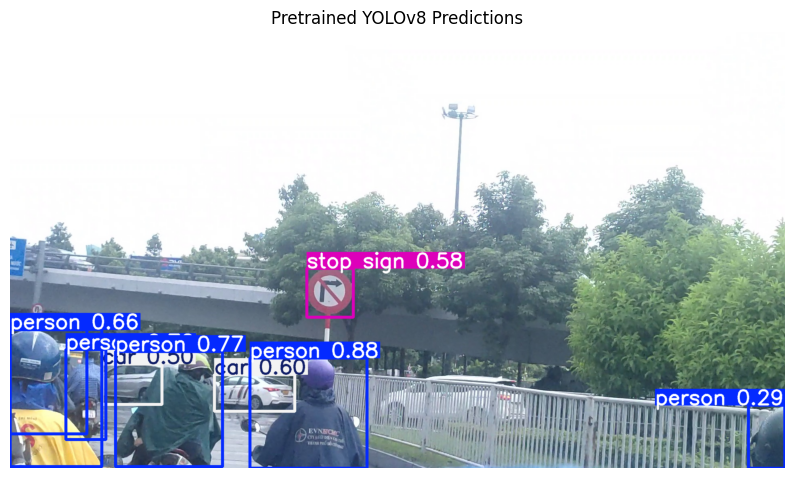

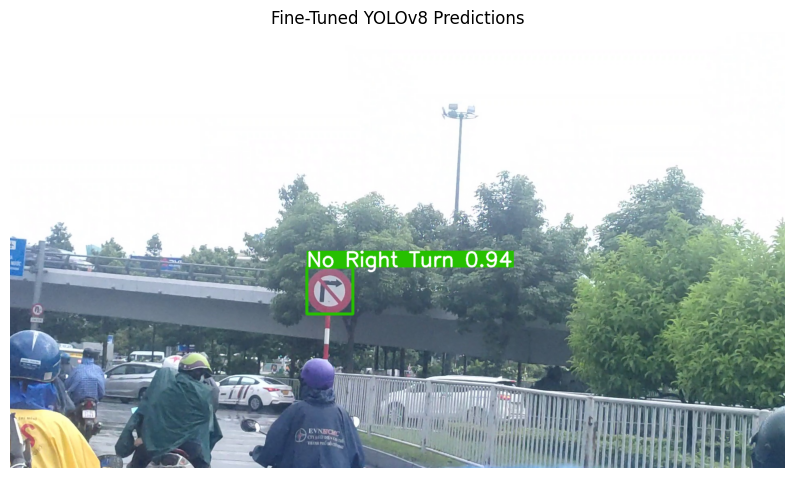

In [13]:
import cv2
from ultralytics import YOLO
from PIL import Image

# Load models
pretrained_model = YOLO("yolov8n.pt")  # Pretrained YOLOv8 model
fine_tuned_model = YOLO("/content/runs/detect/train22222222222222222222222222222222222222222222222/weights/best.pt")


# Image path
image_path = "/content/dataset/archive/split_dataset/test/3170.jpg"

# Run inference on both models
pretrained_results = pretrained_model.predict(source=image_path, imgsz=640)
fine_tuned_results = fine_tuned_model.predict(source=image_path, imgsz=640)

# Function to plot results
def plot_results(results, title):
    plot = results[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(plot)
    image.show(title=title)
    plt.figure(figsize=(10, 6))
    plt.imshow(plot)
    plt.axis("off")
    plt.title(title)
    plt.show()

# Show results
plot_results(pretrained_results, "Pretrained YOLOv8 Predictions")
plot_results(fine_tuned_results, "Fine-Tuned YOLOv8 Predictions")


In [14]:
import shutil
from google.colab import files

# Path to the folder you want to zip
folder_path = "/content/runs/detect"

# Define the output zip file name
zip_path = "/content/49epoch_traffic_sign_detection_yolov8n.zip"

# Zip the folder
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', folder_path)

files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>